In [127]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Pre processing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import os
input_file = pd.ExcelFile(".\data\GPSRetention.xlsx")
GPSRetention = input_file.parse("Page1")
print('Size of GPS Retention',GPSRetention.shape)
#output to csv file so we can read it later easier
GPSRetention.to_csv(".\data\GPSRetention.csv", header=True)

Size of GPS Retention (933, 30)


In [118]:
gps_df = pd.read_csv('./data/GPSRetention.csv')
#gps_df = pd.read_csv('./data/GPSRetention.csv', dtype={'MAJOR_DESC':str})
print(gps_df.columns.values)

['Unnamed: 0' 'Fake_ID' 'STATUS_DESC' 'PROGRAM_DESC' 'MAJOR_DESC'
 'SECOND_MAJOR_DESC' 'OUTCOME_NUMBER' 'OUTCOME_AWARDED_IND'
 'CREDITS_ATTEMPTED' 'CREDITS_EARNED' 'GPA' 'CITIZENSHIP_DESC'
 'RELIGION_DESC' 'VETERAN_CATEGORY_DESC' 'GENDER' 'PRIMARY_ETHNICITY_DESC'
 'MARITAL_STATUS_DESC' 'CITY' 'COUNTY_DESC' 'STATE_PROVINCE' 'POSTAL_CODE'
 'NATION' 'PASSPORT_ISSUE_NATION_DESC' 'IMMIGRATION_STATUS'
 'NATION_OF_BIRTH_DESC' 'NATION_OF_CITIZENSHIP_DESC' 'VISA_TYPE_DESC'
 'GPS_Start_Term_' 'GPS_Last_Term_' 'Took_Non_GPS_Course_Within_Year?'
 'Retained?']


In [189]:
print(gps_df.head())
print(gps_df.tail())

,Unnamed: 0,Fake_ID,STATUS_DESC,PROGRAM_DESC,MAJOR_DESC,SECOND_MAJOR_DESC,OUTCOME_NUMBER,OUTCOME_AWARDED_IND,CREDITS_ATTEMPTED,CREDITS_EARNED,...,NATION,PASSPORT_ISSUE_NATION_DESC,IMMIGRATION_STATUS,NATION_OF_BIRTH_DESC,NATION_OF_CITIZENSHIP_DESC,VISA_TYPE_DESC,GPS_Start_Term_,GPS_Last_Term_,Took_Non_GPS_Course_Within_Year?,Retained?
928,928,528709,Sought/Tracked,MS - Software Engineering,Software Engineering,NaN,1,NaN,41.0,35.0,...,US,Nepal,NRA,Nepal,Nepal,Academic Student,201440,201820,0,1
929,929,560802,Sought/Tracked,MS - Software Engineering,Software Management,NaN,1,NaN,30.0,30.0,...,US,NaN,NaN,NaN,United States of America,NaN,201620,201820,1,1
930,930,556401,Pending,MS - Software Engineering,Information Technology,NaN,1,P,39.0,36.0,...,US,NaN,NaN,NaN,United States of America,NaN,201540,201820,0,1
931,931,446895,Awarded,MS - Software Engineering,Software Engineering,NaN,1,A,42.0,42.0,...,US,Saudi Arabia,NRA,Saudi Arabia,Saudi Arabia,Academic Student,201120,201320,1,1
932,932,479389,Sought/Tracked,MS - Software Engineering,Software Management,NaN,1,NaN,30.0,30.0,...,US,NaN,NaN,NaN,United States of America,NaN,201540,201820,1,1


In [108]:
#messing with data exploring

#print(gps_df[['NATION_OF_BIRTH_DESC']].head(6))
#gps_df['IMMIGRATION_STATUS'].unique()


In [201]:
#manuallly categorical encoding

# convert string values to catogical
status_mapping = {"Awarded": 1, "Sought/Tracked": 2, "Pending": 3}
#gps_df['STATUS_DESC']= gps_df['STATUS_DESC'].map(status_mapping)


major_mapping = {"Data Science": 1, "Software Management": 2, "Software Engineering": 3, "Information Technology": 4, "Software Systems": 5}
#gps_df['MAJOR_DESC']= gps_df['MAJOR_DESC'].map(major_mapping)

program_mapping = {"MS - Software Engineering": 1, "MSS - Software Engineering": 2, "MS-Dual Software/Business": 3}
#gps_df['PROGRAM_DESC']= gps_df['PROGRAM_DESC'].map(program_mapping)

citizenship_mapping = {"U.S. Citizen": 1, "Non-Immigrant Visa Holder": 2, "Permanent Resident": 3, "Asylee/Refugee":4}
#gps_df['CITIZENSHIP_DESC']= gps_df['CITIZENSHIP_DESC'].map(citizenship_mapping)

gender_mapping = {"F": 1, "M": 2}
#gps_df['GENDER']= gps_df['GENDER'].map(gender_mapping)

#putting GPA into 4 buckets
gps_df['GPABand'] = pd.cut(gps_df['GPA'], 4)
#gps_df[['GPABand', 'Retained?']].groupby(['GPABand'], as_index=False).mean().sort_values(by='GPABand', ascending=True)

#have a passport or not
gps_df['HAS_PASSPORT'] = np.where(gps_df['PASSPORT_ISSUE_NATION_DESC'].isnull(), 0, 1)

#born in USA or not?
#NATION_OF_BIRTH_DESC

#has VISA?
#what does US Citizen mean?
#print(gps_df['VISA_TYPE_DESC'].unique())
gps_df['HAS_VISA'] = np.where(gps_df['VISA_TYPE_DESC'].isnull(), 0, 1) 
    

['U.S. Citizen' 'Non-Immigrant Visa Holder' 'Permanent Resident'
 'Asylee/Refugee']


In [119]:
#using sk learn to create the categorical values
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
gps_df["status_code"]      = lb_make.fit_transform(gps_df["STATUS_DESC"])
gps_df["gender_code"]      = lb_make.fit_transform(gps_df["GENDER"])
gps_df["major_code"]       = lb_make.fit_transform(gps_df["MAJOR_DESC"])
gps_df["citizenship_code"] = lb_make.fit_transform(gps_df["CITIZENSHIP_DESC"])
gps_df["veteran_code"]     = lb_make.fit_transform(gps_df["VETERAN_CATEGORY_DESC"].astype(str))
gps_df["religion_code"]    = lb_make.fit_transform(gps_df["RELIGION_DESC"])
gps_df["marital_code"]     = lb_make.fit_transform(gps_df["MARITAL_STATUS_DESC"])
gps_df["primary_ethnicity_code"]     = lb_make.fit_transform(gps_df["PRIMARY_ETHNICITY_DESC"])
gps_df["state_code"]     = lb_make.fit_transform(gps_df["STATE_PROVINCE"])
gps_df["immigration_code"] = lb_make.fit_transform(gps_df["IMMIGRATION_STATUS"].astype(str))
gps_df["nation_code"] = lb_make.fit_transform(gps_df["NATION"])



#making a gpa bucket before creating the code
gps_df['gpa_bucket'] = pd.cut(gps_df['GPA'], 4) #having 5 gave no value
gps_df["gpa_code"]   = lb_make.fit_transform(gps_df["gpa_bucket"])
#gps_df[['gpa_bucket', 'Retained?']].groupby(['gpa_bucket'], as_index=False).mean().sort_values(by='gpa_bucket', ascending=True)

#making flag columns
gps_df['has_passport'] = np.where(gps_df['PASSPORT_ISSUE_NATION_DESC'].isnull(), 0, 1)
gps_df['has_visa']     = np.where(gps_df['VISA_TYPE_DESC'].isnull(), 0, 1) 

#gps_df[["VETERAN_CATEGORY_DESC","veteran_code"]].head(11)


#Re-name possible y values
gps_df.rename(columns = {'Retained?':'retained'}, inplace = True)

#note sure what to do with these columns
#'GPS_Start_Term_' 'GPS_Last_Term_' 'Took_Non_GPS_Course_Within_Year?'


In [121]:
#drop columns we dont want
gps_df = gps_df.drop(['Fake_ID','CREDITS_EARNED','GPA','STATUS_DESC','PROGRAM_DESC','MAJOR_DESC',
                     'SECOND_MAJOR_DESC','OUTCOME_NUMBER','OUTCOME_AWARDED_IND','CREDITS_ATTEMPTED',
                      'CREDITS_EARNED','GPA','CITIZENSHIP_DESC','RELIGION_DESC','VETERAN_CATEGORY_DESC',
                      'GENDER','PRIMARY_ETHNICITY_DESC','MARITAL_STATUS_DESC','CITY','COUNTY_DESC',
                      'STATE_PROVINCE','POSTAL_CODE','NATION','PASSPORT_ISSUE_NATION_DESC','IMMIGRATION_STATUS',
                      'NATION_OF_BIRTH_DESC','NATION_OF_CITIZENSHIP_DESC','VISA_TYPE_DESC',
                      #created columns
                      'gpa_bucket','Unnamed: 0',
                      #no sure on these yet
                      'GPS_Start_Term_','GPS_Last_Term_','Took_Non_GPS_Course_Within_Year?'
                    ], axis=1)


In [122]:
#output the head of data
gps_df.head()

,retained,status_code,gender_code,major_code,citizenship_code,veteran_code,religion_code,marital_code,primary_ethnicity_code,state_code,immigration_code,nation_code,gpa_code,has_passport,has_visa
0,1,0,0,3,3,2,3,2,6,12,3,5,3,0,0
1,0,2,1,0,3,2,3,2,1,12,3,5,3,0,0
2,0,2,1,2,1,2,3,4,1,12,0,5,0,1,1
3,1,0,0,1,1,2,11,4,1,12,0,5,2,1,0
4,1,0,1,0,3,2,16,2,6,12,3,5,3,0,0


In [123]:
#output describe of each column
gps_df.describe()


,retained,status_code,gender_code,major_code,citizenship_code,veteran_code,religion_code,marital_code,primary_ethnicity_code,state_code,immigration_code,nation_code,gpa_code,has_passport,has_visa
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,0.764202,0.810289,0.675241,1.854234,2.182208,1.996785,7.844587,2.944266,3.422294,12.941050,2.216506,5.008574,2.765273,0.306538,0.221865
std,0.424725,0.946771,0.468536,1.200937,0.937434,0.073174,4.882137,1.136170,2.271681,3.851837,1.305430,0.310633,0.629731,0.461303,0.415724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,12.000000,0.000000,5.000000,3.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,2.000000,3.000000,2.000000,7.000000,2.000000,3.000000,12.000000,3.000000,5.000000,3.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,2.000000,3.000000,2.000000,12.000000,4.000000,6.000000,12.000000,3.000000,5.000000,3.000000,1.000000,0.000000
max,1.000000,2.000000,1.000000,4.000000,3.000000,2.000000,16.000000,5.000000,6.000000,29.000000,3.000000,6.000000,3.000000,1.000000,1.000000


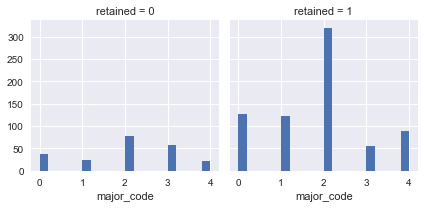

In [126]:
#look at major
g = sns.FacetGrid(gps_df, col='retained')
g.map(plt.hist, 'major_code', bins=20)

# Split up data between train and test

In [130]:
X_train, X_test, y_train, y_test = train_test_split(gps_df.drop('retained', axis=1), gps_df.retained, test_size=0.33, random_state=42)

#output the size of test and train data
print(X_train.shape, y_train.shape, X_test.shape)

(625, 14) (625,) (308, 14)


# Logistics Regression

## Confidence Score (ACC %)

In [132]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
acc_log = round(log_reg.score(X_train, y_train)*100, 2)
acc_log

89.439999999999998

## Column Coeffs

In [138]:
coeff_df = pd.DataFrame(gps_df.columns.delete(0)) #grabbing only column names into dataframe
coeff_df.columns = ['Feature'] #giving column a name
coeff_df["Correleation"] = pd.Series(log_reg.coef_[0]) #grabbing coeff of each column
coeff_df.sort_values(by='Correleation',ascending=False) #output coeff values

,Feature,Correleation
11,gpa_code,1.038232
3,citizenship_code,0.912403
1,gender_code,0.772811
13,has_visa,0.668923
10,nation_code,0.508375
12,has_passport,0.230082
4,veteran_code,0.037509
5,religion_code,0.020563
8,state_code,-0.008753
7,primary_ethnicity_code,-0.072224


# Support Vector Machine

In [142]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train)*100, 2)
acc_svc #outputting the acc score from SVM model

91.359999999999999

# K-Nearest Neighbors

In [145]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train)*100, 2)
acc_knn

90.879999999999995

# Guassian Naive Bays

In [148]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train)*100,2)
acc_gaussian

84.480000000000004

# Perceptron

In [152]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train)*100,2)
acc_perceptron

83.680000000000007

# Linear SVC

In [154]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
acc_linear_svc = round(linear_svc.score(X_train, y_train)*100, 2)
acc_linear_svc


89.920000000000002

# Stochastic Gradient Descent

In [156]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train)*100, 2)
acc_sgd

86.719999999999999

# Decision Tree

In [158]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train)*100,2)
acc_decision_tree

98.079999999999998

# Random Forest

In [161]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train)*100, 2)
acc_random_forest

98.079999999999998

# Model Evaluation

In [163]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.08
8,Decision Tree,98.08
0,Support Vector Machines,91.36
1,KNN,90.88
7,Linear SVC,89.92
2,Logistic Regression,89.44
6,Stochastic Gradient Decent,86.72
4,Naive Bayes,84.48
5,Perceptron,83.68
